<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Reddit

--- 
# Notebook 1

The first notebook will comprise of scrapping the data using API and putting it into 2 dataframes.

---


**Problem Statement**
Reddit is a massive collection of forums where people can share social news and content. Essentially, posts are organised according to subject into user-created 'subreddits'. Members submit content (such as images, texts, and links) to subreddits, which can then be voted up ('upvote') or down ('downvote') by other members.
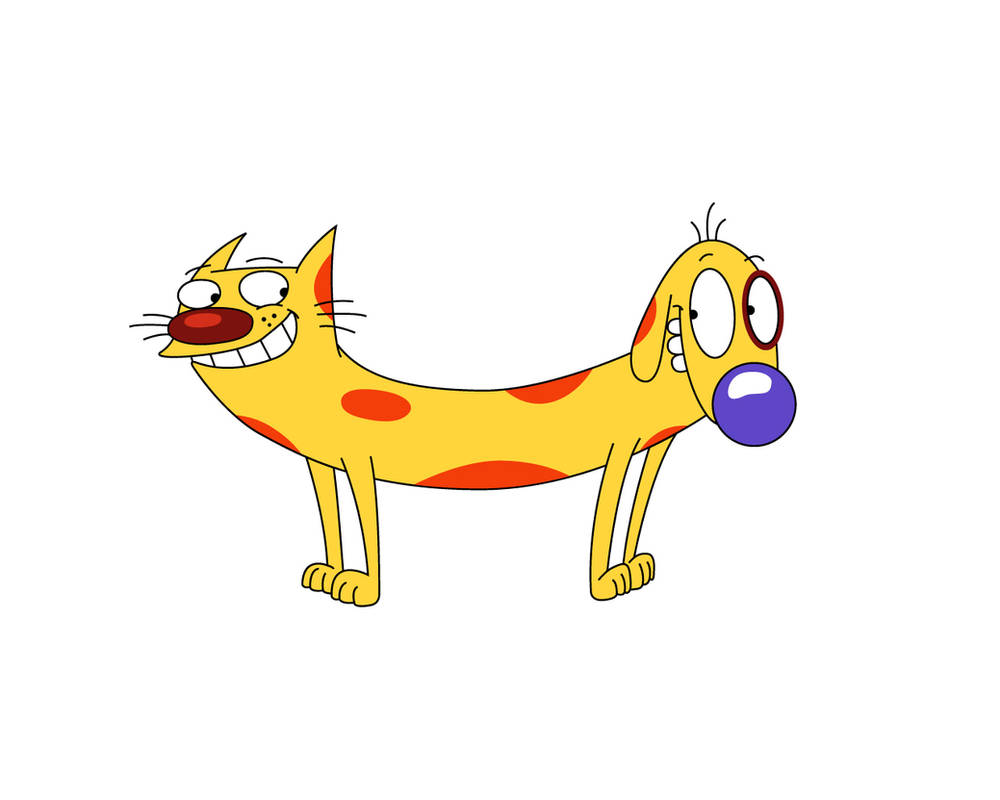 
Since the COVID-19 pandemic in 2019, many news reports reveal that there has been a rapidly growing interest in pet ownership.
More people have expressed interest in adopting or fostering dogs and cats for various reasons - such as for companionship during circuit breaker or ease of caring for pets due to work-from-home arrangements.
 
Introducing "CatDog" - a solutions provider company in the Pet Industry. CatDog has outsourced us data scientists to 1) examine the topics of interest/needs of these new dog and cat owners and 2) provide relevant suggestions on creating new services for  dog and cat owners. The goal of this project is simple - to figure out the wants and needs of dog and cat owners by looking at relevant subreddits. Our team aims to engineer two supervised classification models - namely Random Forest Classifier and Logistics Regression Classifier - and to select one model that best predicts the classification of the subreddit for current and future posts submitted by either dog or cat owners. Our team will select the best model based on the initial accuracy score (which tells us its predictive power) of both models on the train set, and look at the most important word features for that particular model to draw conclusions for CatDog. The two subreddits are:
- [r/Cats](https://www.reddit.com/r/cats/)
- [r/Dogs](https://www.reddit.com/r/dogs/)


### 1.1 Data Collection form subreddit Cats
Extracting 1000 posts from subreddit Cats and create a dataframe using title.

In [9]:
import requests
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Stating the parameters
url = 'https://api.pushshift.io/reddit/search/submission'
params = {
    'subreddit': 'cats',
    'size': 100,
    'before' : 1641398400 #Local Datetime as 6th Jan 12am
}

In [3]:
res = requests.get(url, params)
res.status_code # check connection status, if 200 means successfully connected

200

In [4]:
data = res.json()
posts = data['data']
len(posts) # Check to see if we extracted 100 posts

100

In [5]:
# Create dataframe for cats
df_cats = pd.DataFrame(posts)

In [26]:
# Extracting another 9900 posts to get 10000 rows for df_cats

for i in range(99):
    params = {'subreddit': 'cats', 'size': 100, 'before': posts[-1]['created_utc']}
    response = requests.get(url, params)
    data = response.json()
    posts = data['data']
    df_cats = df_cats.append(pd.DataFrame(posts))

# Check if we have 10000 posts
df_cats.shape

(9997, 84)

In [27]:
df_cats.head()

,subreddit,title,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,...,author_flair_template_id,author_flair_text_color,author_cakeday,media,media_embed,secure_media,secure_media_embed,category,banned_by,edited
0,cats,I came home sick from work with pneumonia. Her...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cats,My sleepyhead curled up this morning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cats,"Spooky takes care of me when I WFH, who needs ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cats,Hi! I am a new cat mom and am hoping someone m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cats,"Spooky looks after me when I WFH, who needs a ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_cats = df_cats[['subreddit', 'title']]

In [29]:
df_cats

,subreddit,title
0,cats,I came home sick from work with pneumonia. Her...
1,cats,My sleepyhead curled up this morning
2,cats,"Spooky takes care of me when I WFH, who needs ..."
3,cats,Hi! I am a new cat mom and am hoping someone m...
4,cats,"Spooky looks after me when I WFH, who needs a ..."
...,...,...
95,cats,Mooches.
96,cats,My 19y old cat Blacky passed away today. She w...
97,cats,"it was a nice day out, so we let Swiper out in..."
98,cats,Morning snuggles are best snuggles


In [30]:
df_cats.to_csv('../project_3/CSV files/cats.csv')

### 1.2 Data Collection form subreddit Dogs
Extracting 1000 posts from subreddit Dogs and create a dataframe using title.

In [15]:
# Changing the parameters for dogs
params = {
    'subreddit': 'dogs',
    'size': 100,
    'before' : 1641398400 #Local Datetime as 6th Jan 12am
}

In [16]:
# Create dataframe for dogs
res = requests.get(url, params)
data = res.json()
posts = data['data']
df_dogs = pd.DataFrame(posts)

In [19]:
# Extracting another 900 posts to get 1000 rows for df_dogs
 
for i in range(99):
    try:
        params = {'subreddit': 'dogs', 'size': 100, 'before': posts[-1]['created_utc']}
        response = requests.get(url, params)
        data = response.json()
        posts = data['data']
        df_dogs = df_dogs.append(pd.DataFrame(posts))
    except:
        print('Ran into some error')
        pass

In [20]:
df_dogs.shape

(9996, 78)

In [23]:
df_dogs = df_dogs[['subreddit', 'title']]
df_dogs.to_csv('../project_3/CSV files/dogs.csv')

In [24]:
df_dogs

,subreddit,title
0,dogs,My dog bites himself
1,dogs,How do you keep your dogs passively stimulated?
2,dogs,Dog's Sleeping Behavior Changed with Pregnant ...
3,dogs,Soft food diet after surgery
4,dogs,Does anyone know much about Intracranial Arach...
...,...,...
95,dogs,RIP: Mary- Toy Poodle 6 years old
96,dogs,Border Collie
97,dogs,Are clementines okay for dogs?
98,dogs,[help] choosing a companion for our current dog
